In [42]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [43]:
def calculate_iqr_boundaries(series):
    q25 = series.quantile(0.25)
    q75 = series.quantile(0.75)
    iqr = q75 - q25

    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries

In [44]:
def filter_outliers(df, window_size, overlap_percent):
    start_index, end_index = df.index[0], df.index[-1]
    new_val = df.loc[start_index : end_index, 'values'].copy()
    idx_list = []
    idx_list_cor = []
    
    for i in range((start_index),(start_index + window_size), int(window_size*(1 - (overlap_percent / 100)))):
        value_bounds = calculate_iqr_boundaries(new_val.loc[start_index: (i + window_size)])
        for j in range((start_index), (i + window_size + 1)):
            if new_val.loc[j] < value_bounds[0]:
                new_val.loc[j] = np.median(new_val.loc[start_index: (j + window_size)])
                idx_list.append(j)
            
    for i in range((start_index + window_size),(end_index - window_size), int(window_size*(1 - (overlap_percent / 100)))):
        value_bounds = calculate_iqr_boundaries(new_val.loc[(i - window_size):(i + window_size)])
        for j in range((i - window_size),(i + window_size + 1)):
            if new_val.loc[j] < value_bounds[0]:
                new_val.loc[j] = np.median(new_val.loc[(j - window_size):(j + window_size)])
                idx_list.append(j)

    for i in range((end_index - window_size),(end_index + 1), int(window_size*(1 - (overlap_percent / 100)))):
        value_bounds = calculate_iqr_boundaries(new_val.loc[(i - window_size):(end_index + 1)])
        for j in range((i - window_size), (end_index + 1)):
            if new_val.loc[j] < value_bounds[0]:
                new_val.loc[j] = np.median(new_val.loc[(j - window_size):(end_index + 1)])
                idx_list.append(j)
            
    for idx in idx_list:
        if ((idx - 5 in idx_list) and (idx - 4 in idx_list) and (idx - 3 in idx_list) and (idx - 2 in idx_list) and (idx - 1 in idx_list)) or n\
        ((idx + 5 in idx_list) and (idx + 4 in idx_list) and (idx + 3 in idx_list) and (idx + 2 in idx_list) and (idx + 1 in idx_list)):
            idx_list_cor.append(idx)
            
    return idx_list_cor

In [45]:
def correction_visualization(path, window_size, overlap_percent):
    df = pd.read_csv(path)
    for i in range(1, df.series_id.nunique() + 1):
        df.loc[filter_outliers(df[df['series_id'] == i], window_size, overlap_percent), 'new_outlier'] = 1
        df.loc[df[df['series_id'] == i].index, 'new_outlier'] = df.loc[df[df['series_id'] == i].index, 'new_outlier'].fillna(0)
    
        plt.figure(figsize=(18,4))
        plt.plot(df[(df['series_id'] == i)]['time_index'], df[(df['series_id'] == i)]['values'], label = str('Исходный ряд №' + str(i)))
        plt.scatter(df[(df['series_id'] == i) & (df['outlier'] == 1)]['time_index'], df[(df['series_id'] == i) & (df['outlier'] == 1)]['values'], c='r', marker = 'x', s=150, label = ' Исходные выбросы')
        plt.scatter(df[(df['series_id'] == i) & (df['new_outlier'] == 1)]['time_index'], df[(df['series_id'] == i) & (df['new_outlier'] == 1)]['values'], c='black', marker = 'o', label = 'Новые выбросы')
        plt.xlabel('Дата')
        plt.ylabel('млн. куб. м.')
        plt.legend(loc=3)
        plt.xticks(plt.xticks()[0][0::500])
        plt.show()
    return df

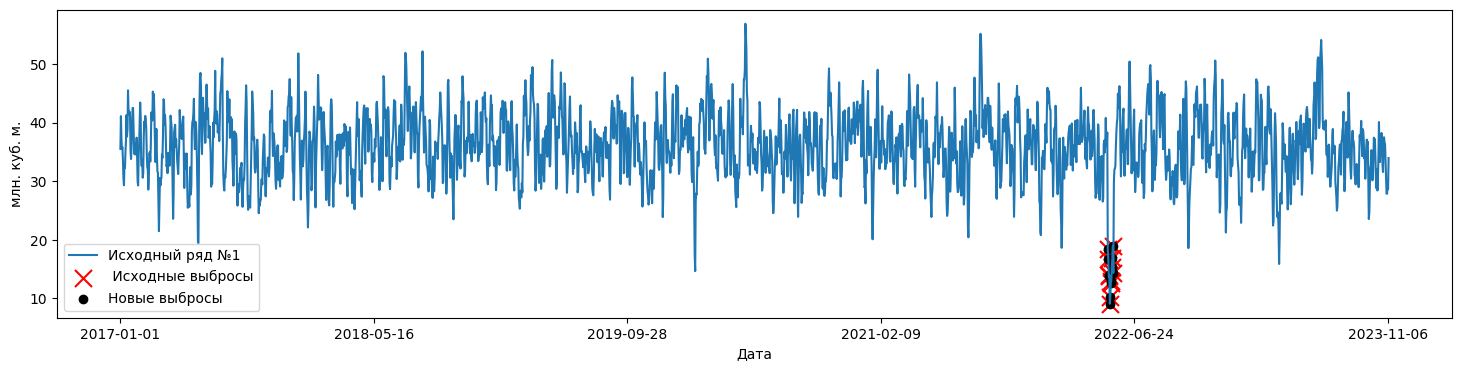

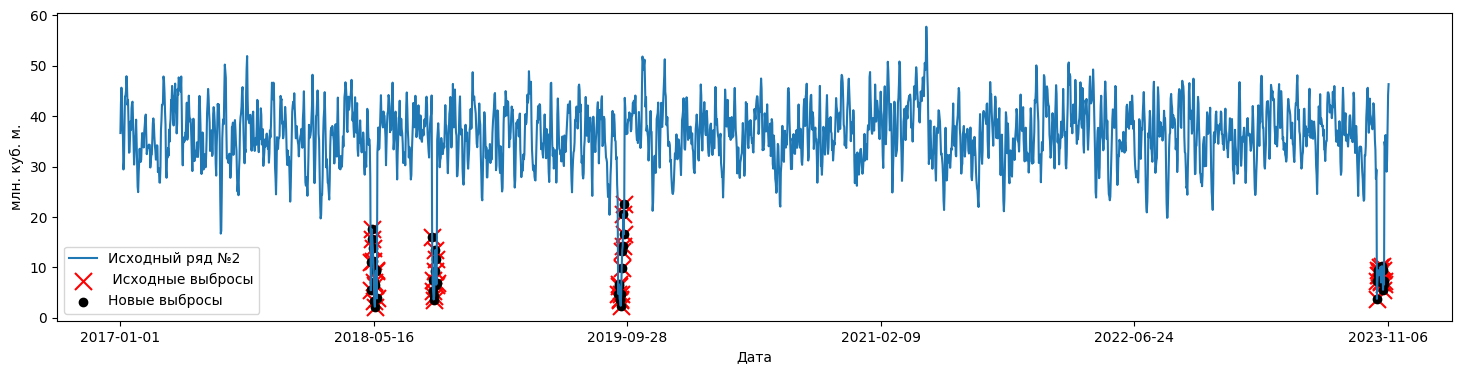

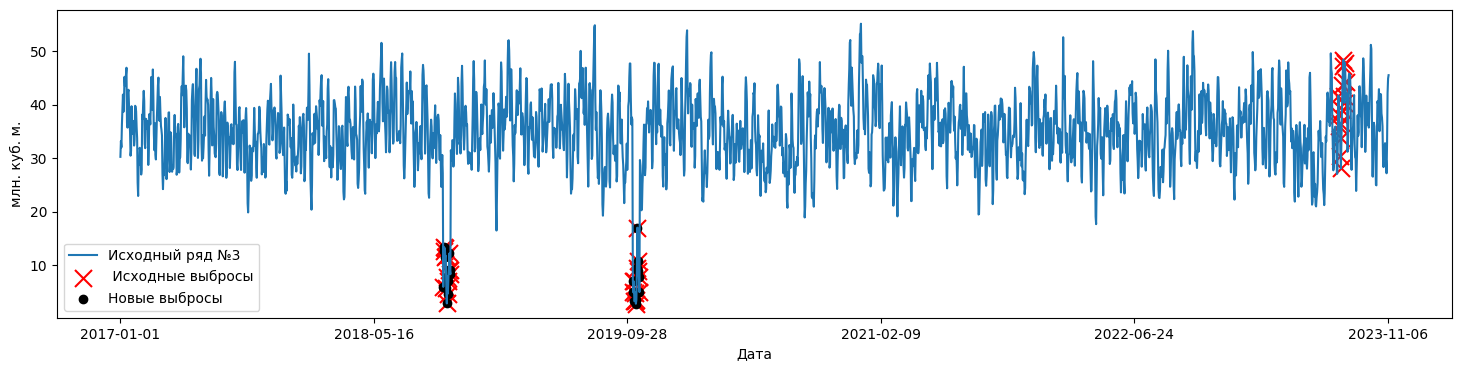

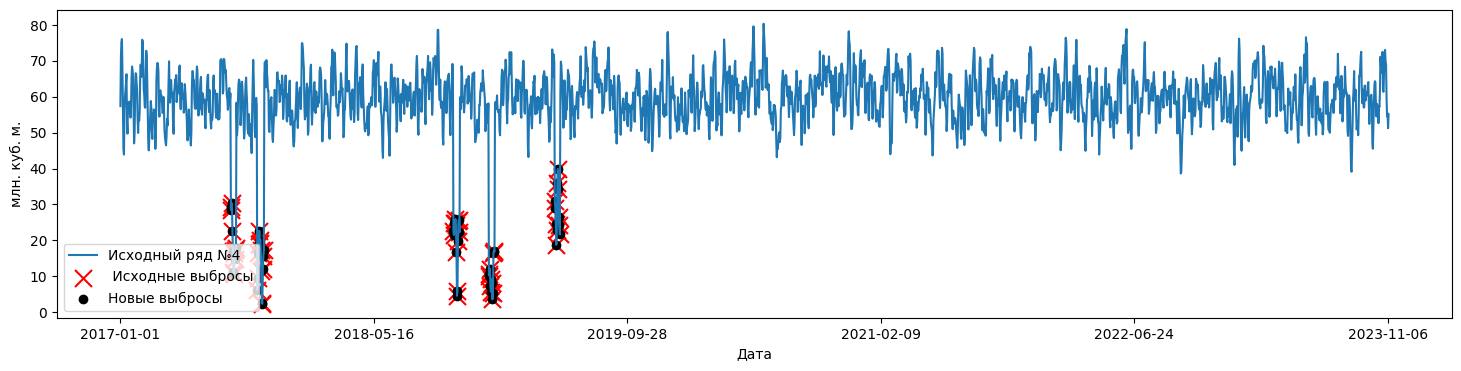

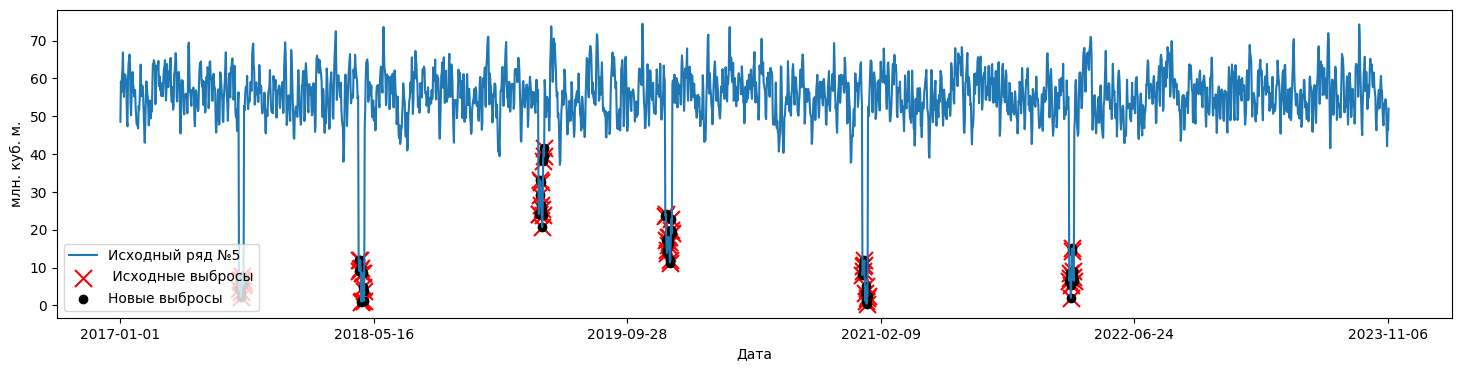

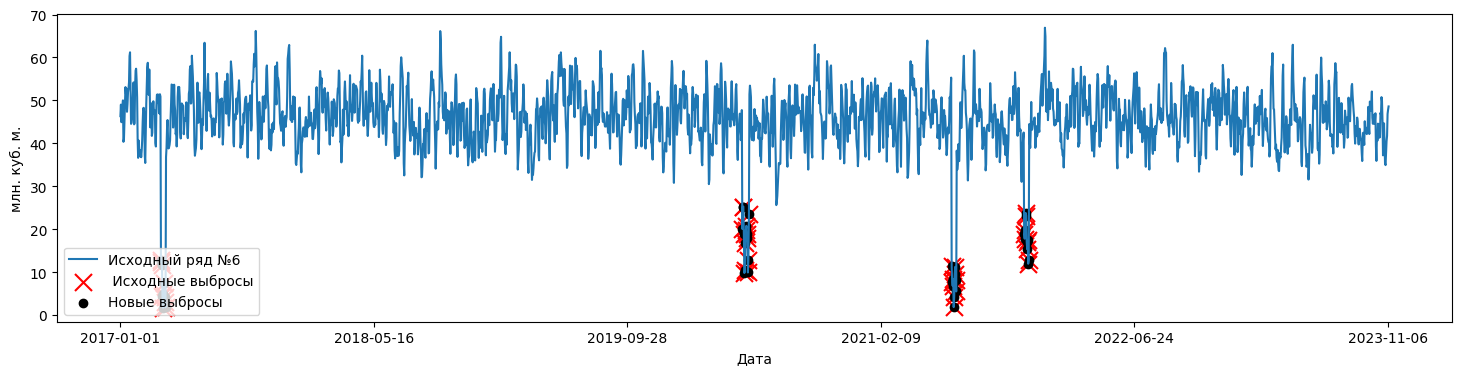

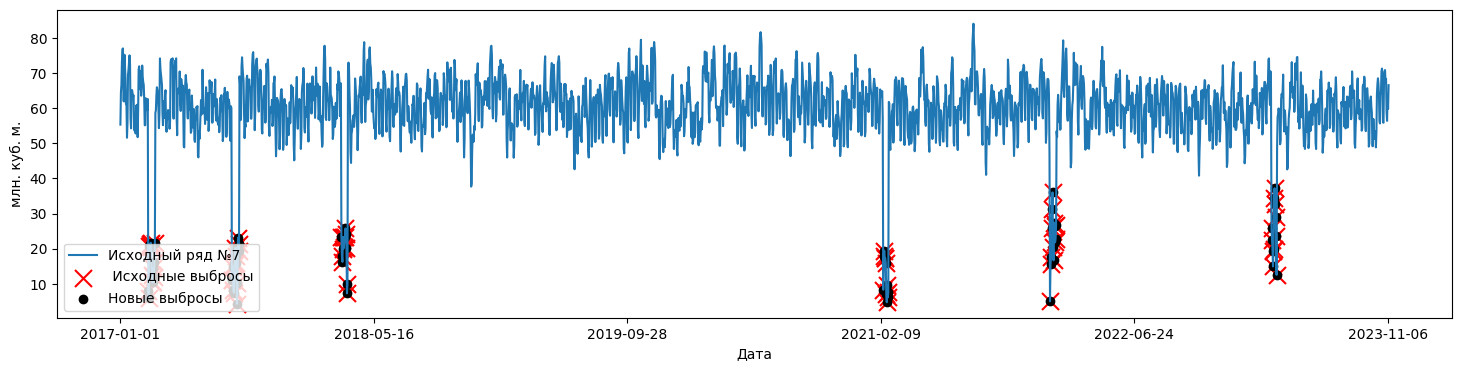

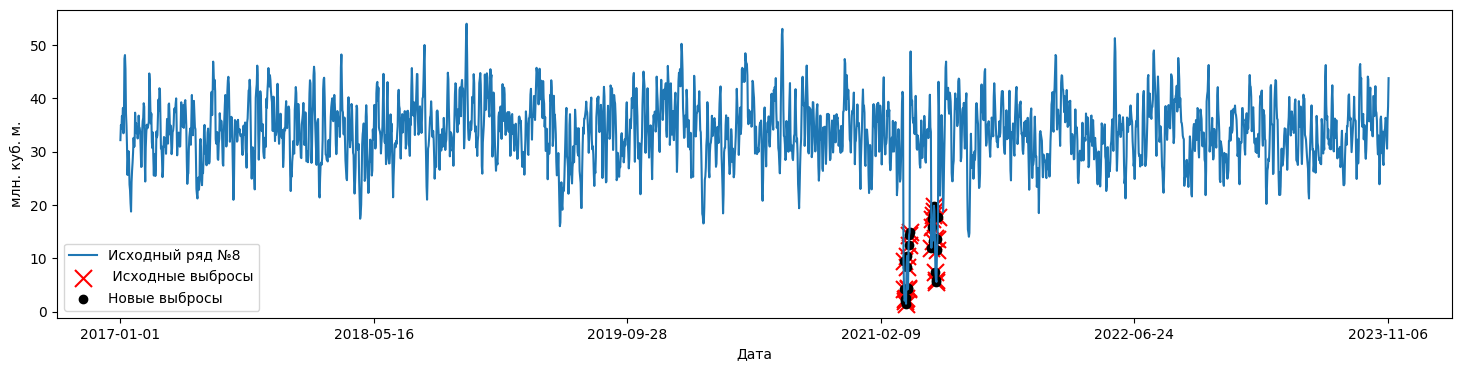

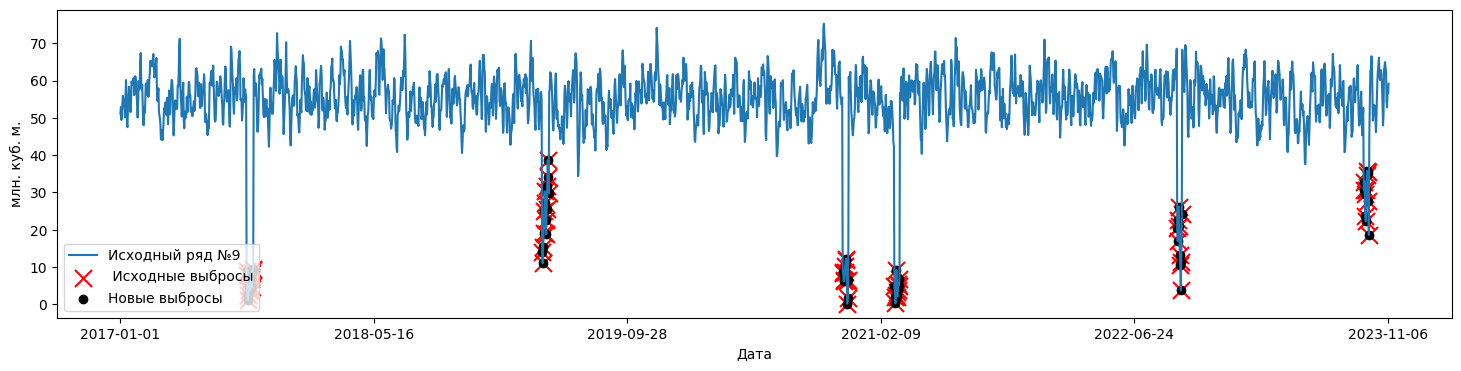

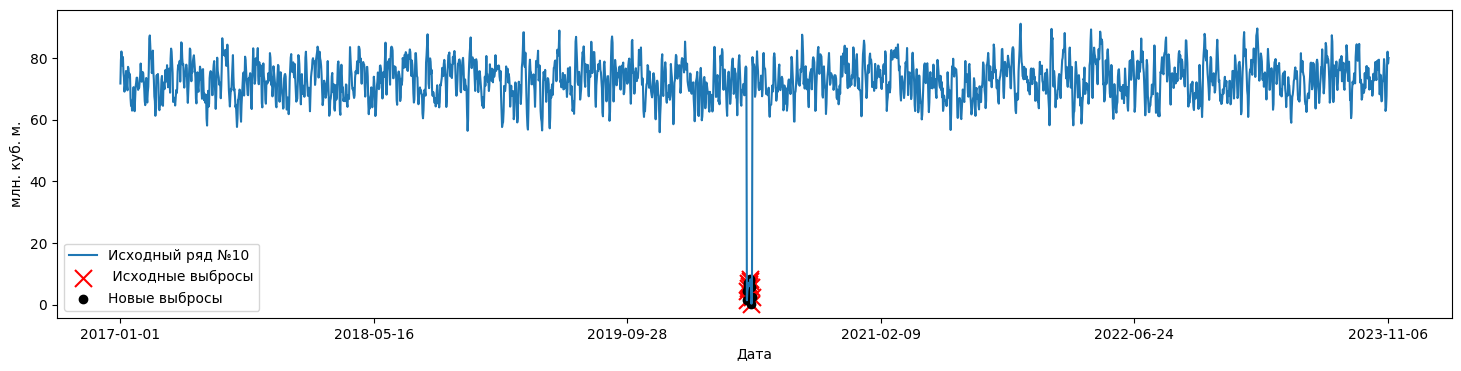

,time_index,values,outlier,series_id,new_outlier
0,2017-01-01,35.523293,0,1,0.0
1,2017-01-02,41.120430,0,1,0.0
2,2017-01-03,37.308064,0,1,0.0
3,2017-01-04,35.516994,0,1,0.0
4,2017-01-05,35.802340,0,1,0.0
...,...,...,...,...,...
25025,2023-11-04,67.636300,0,10,0.0
25026,2023-11-05,77.621200,0,10,0.0
25027,2023-11-06,82.027520,0,10,0.0
25028,2023-11-07,78.200980,0,10,0.0


In [5]:
correction_visualization('task_1.csv', 250, 30)

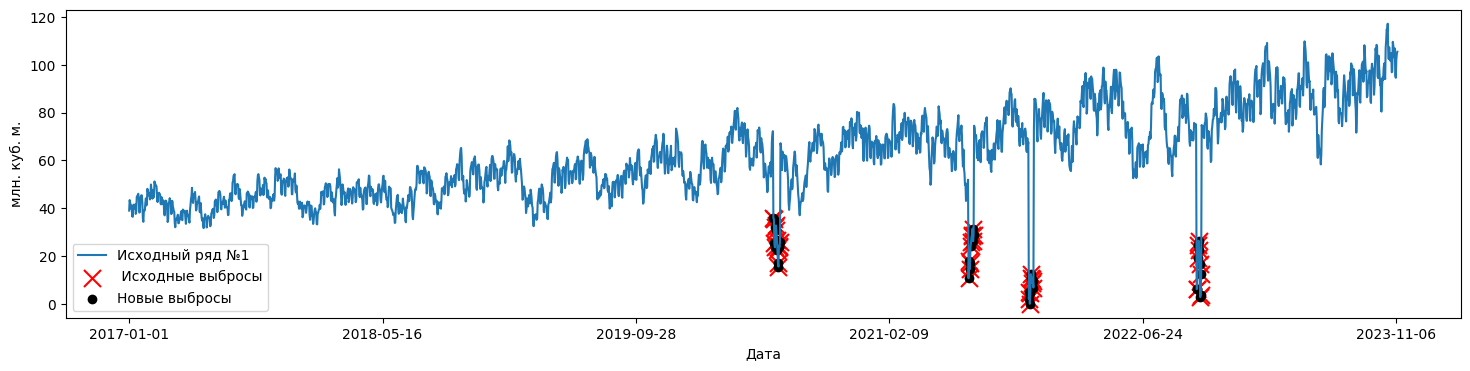

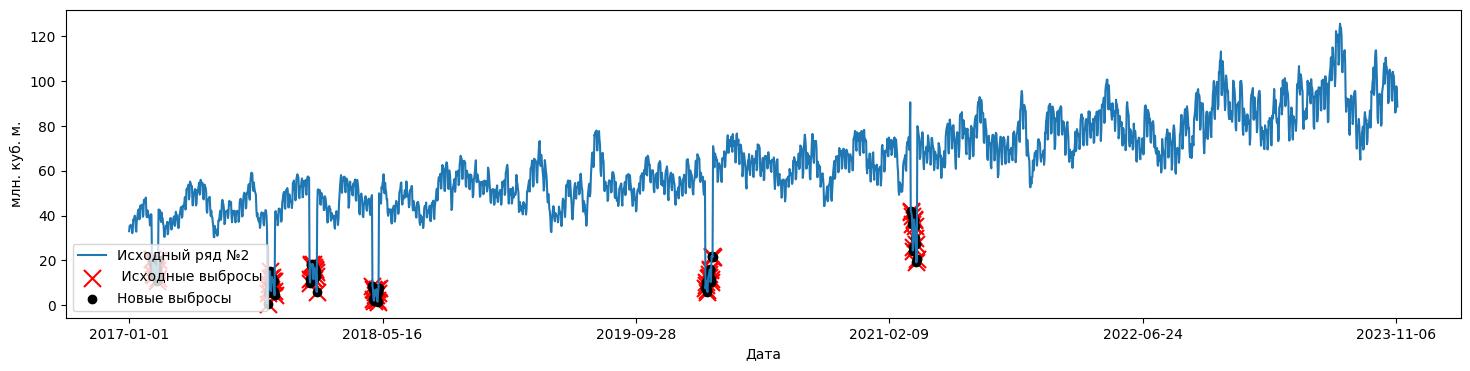

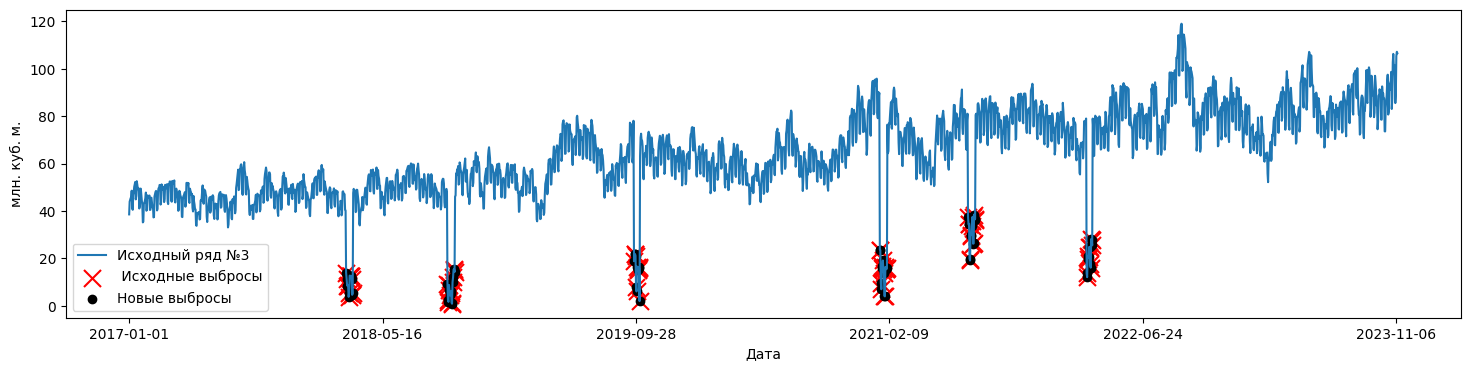

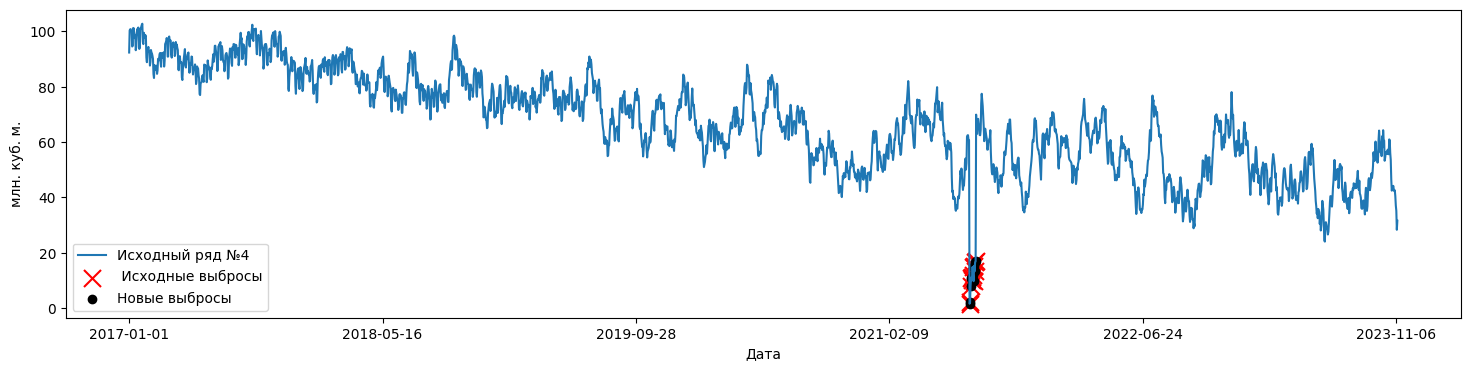

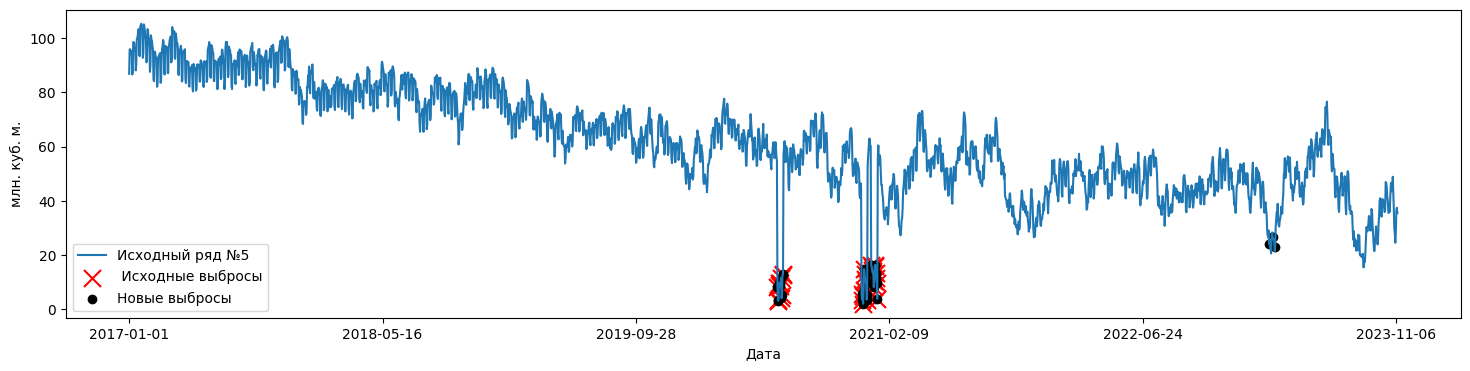

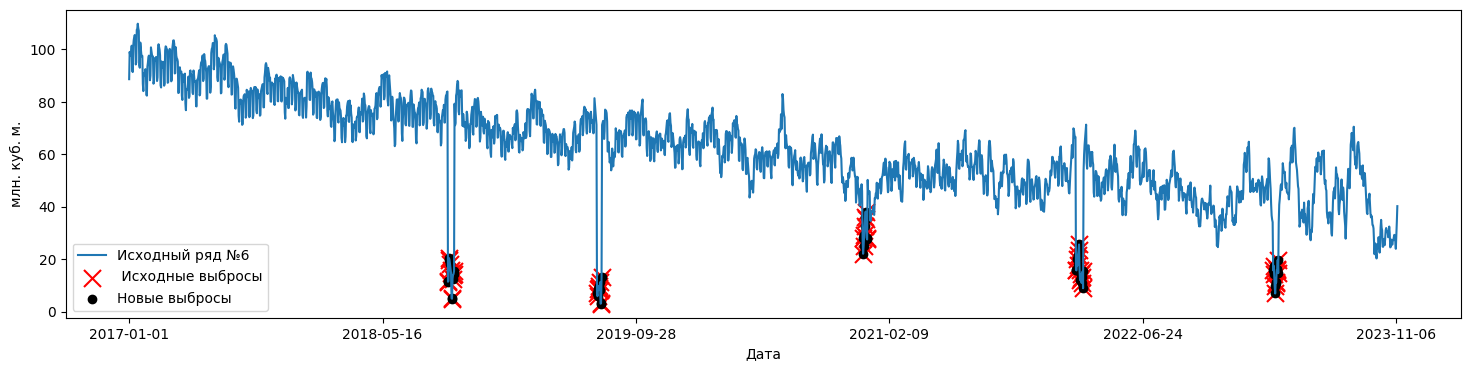

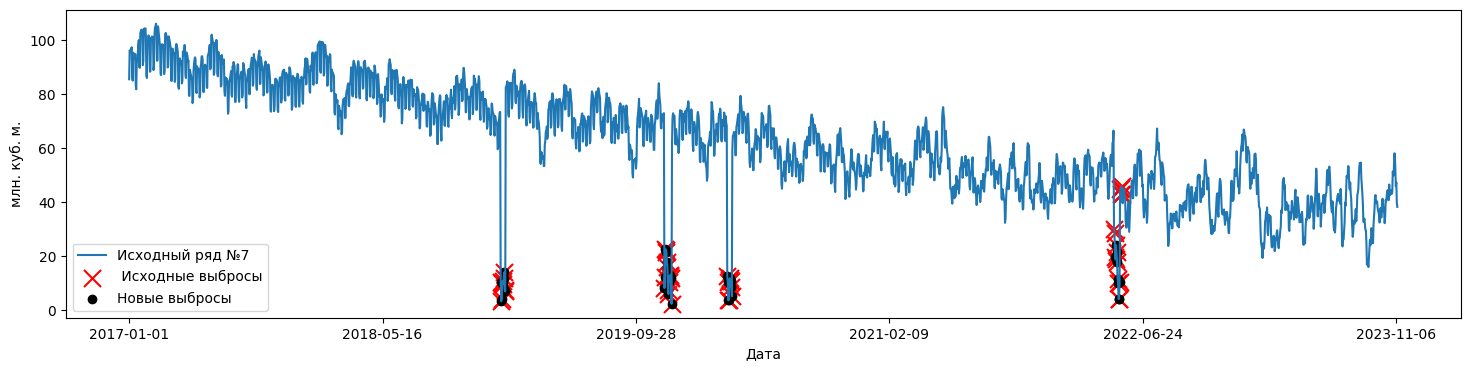

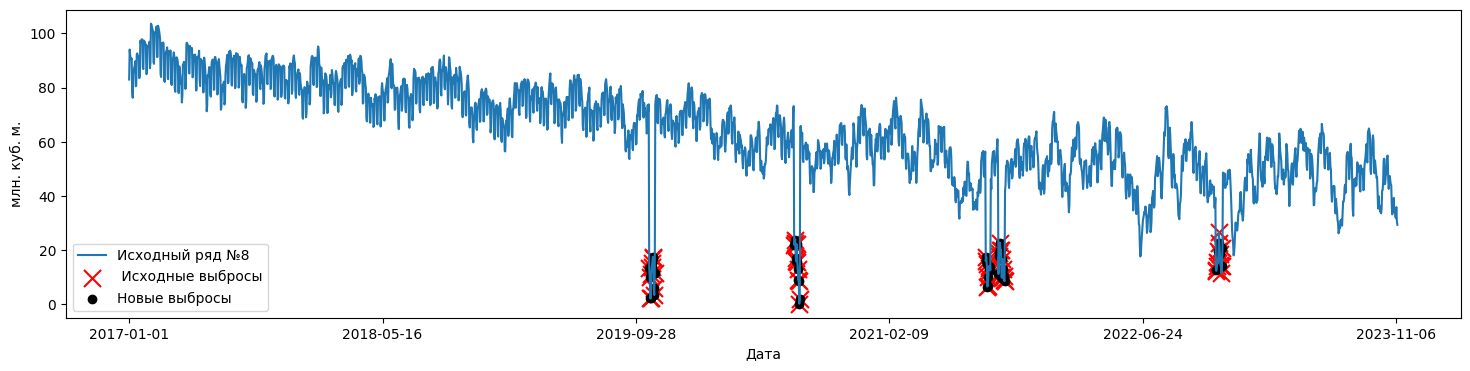

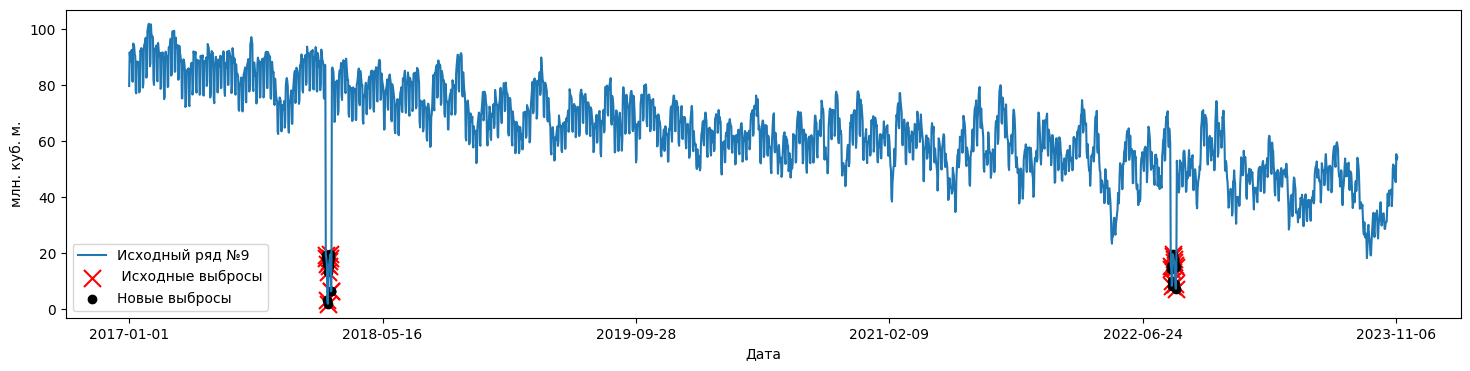

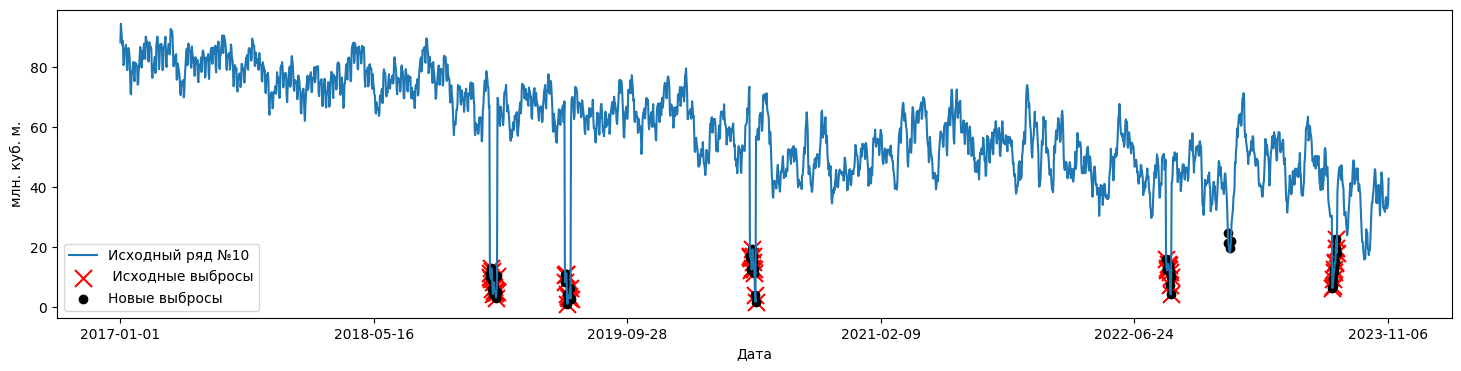

,time_index,values,outlier,series_id,new_outlier
0,2017-01-01,39.012398,0,1,0.0
1,2017-01-02,43.418420,0,1,0.0
2,2017-01-03,42.193043,0,1,0.0
3,2017-01-04,41.436940,0,1,0.0
4,2017-01-05,39.771320,0,1,0.0
...,...,...,...,...,...
25025,2023-11-04,35.124230,0,10,0.0
25026,2023-11-05,32.912907,0,10,0.0
25027,2023-11-06,33.682700,0,10,0.0
25028,2023-11-07,34.201015,0,10,0.0


In [6]:
correction_visualization('task_2.csv', 150, 30)

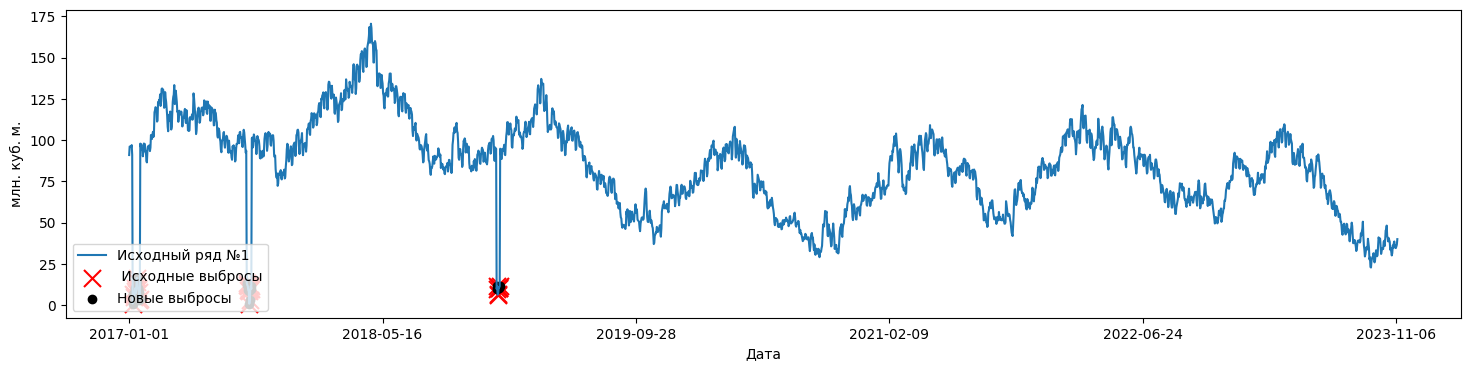

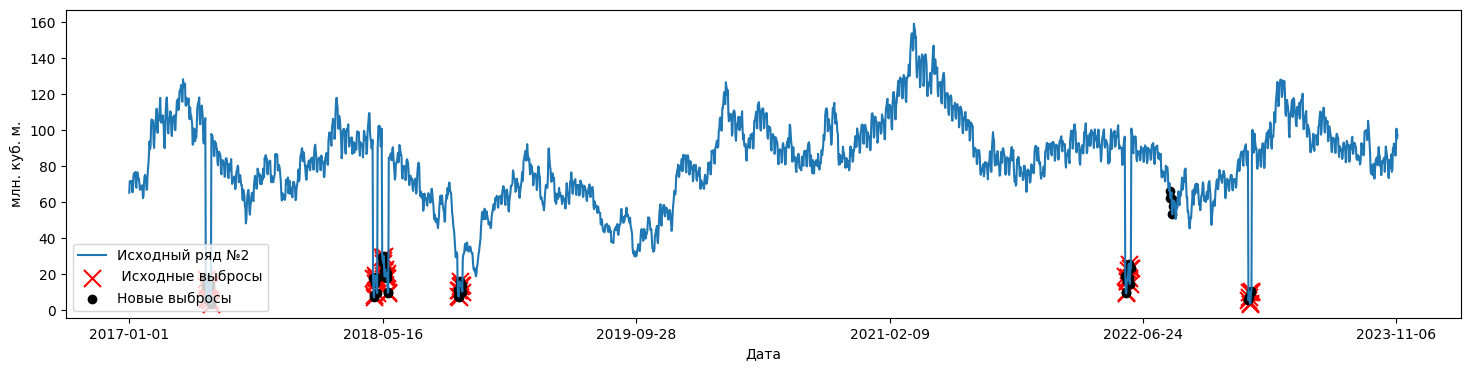

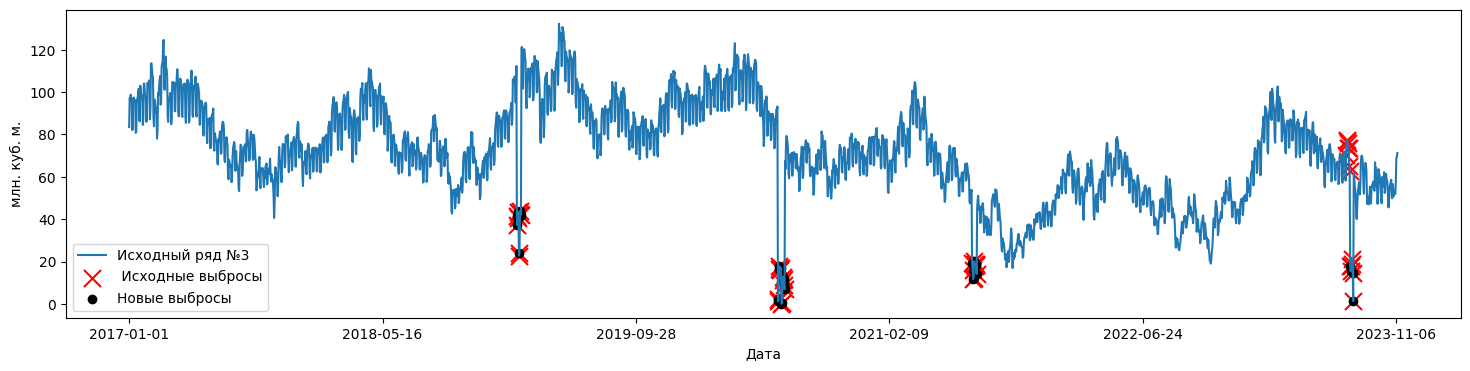

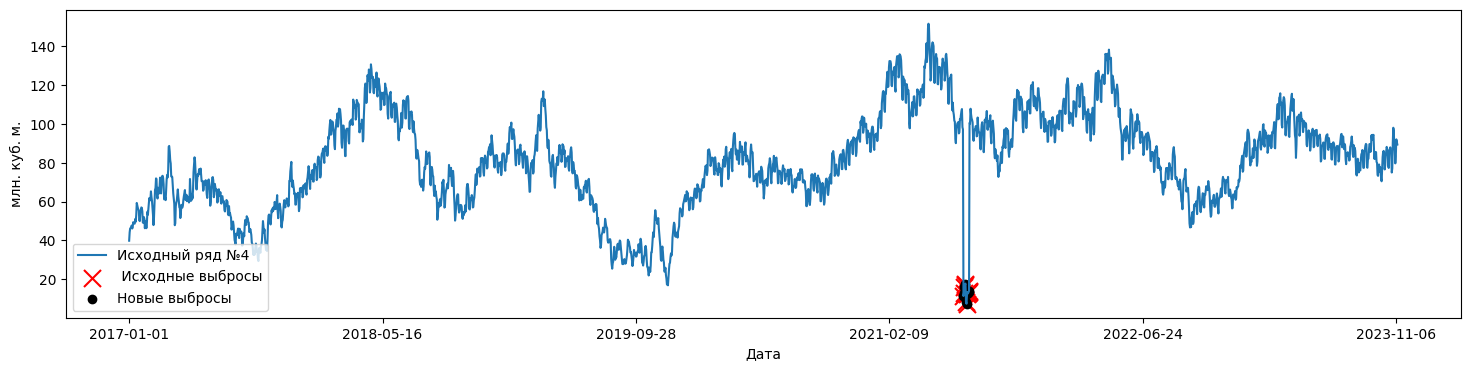

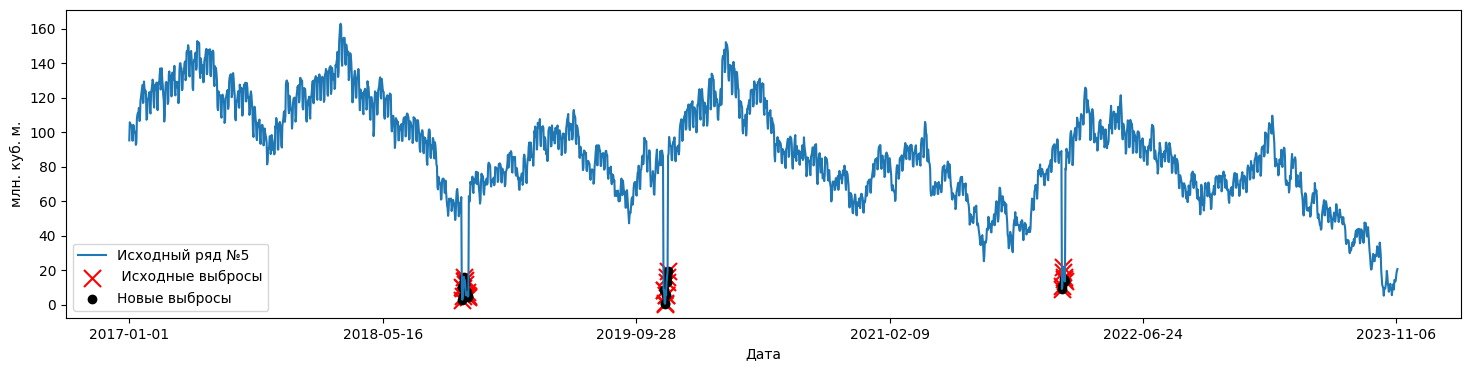

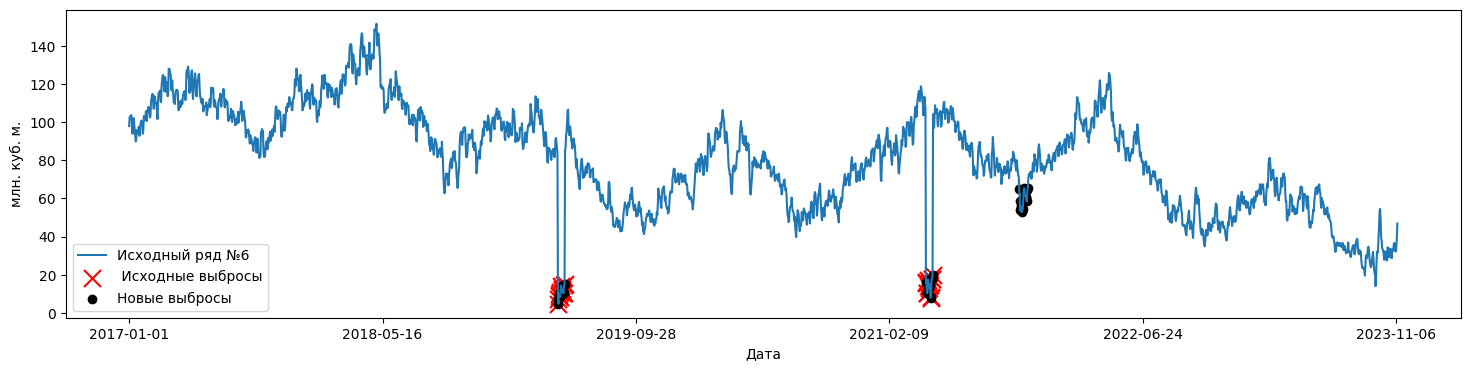

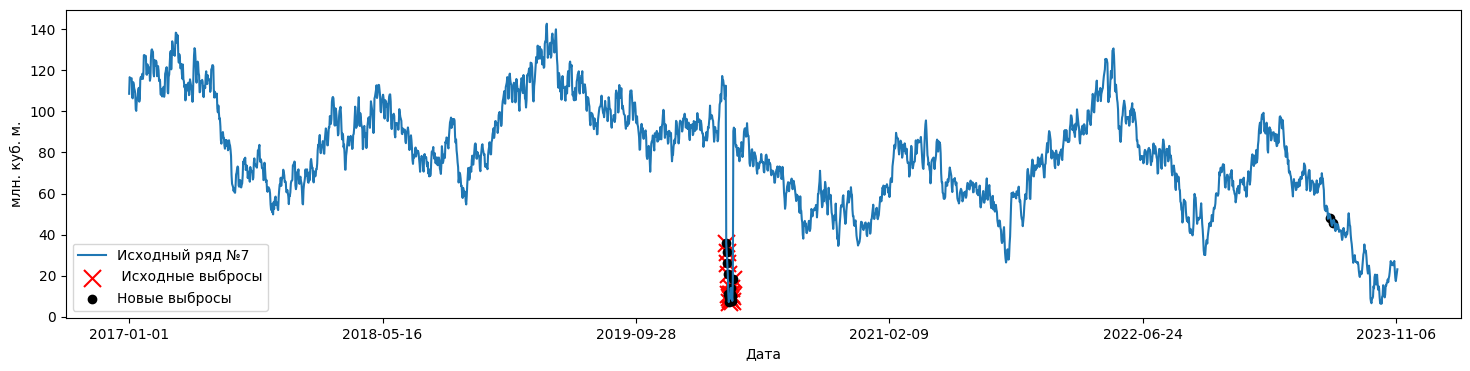

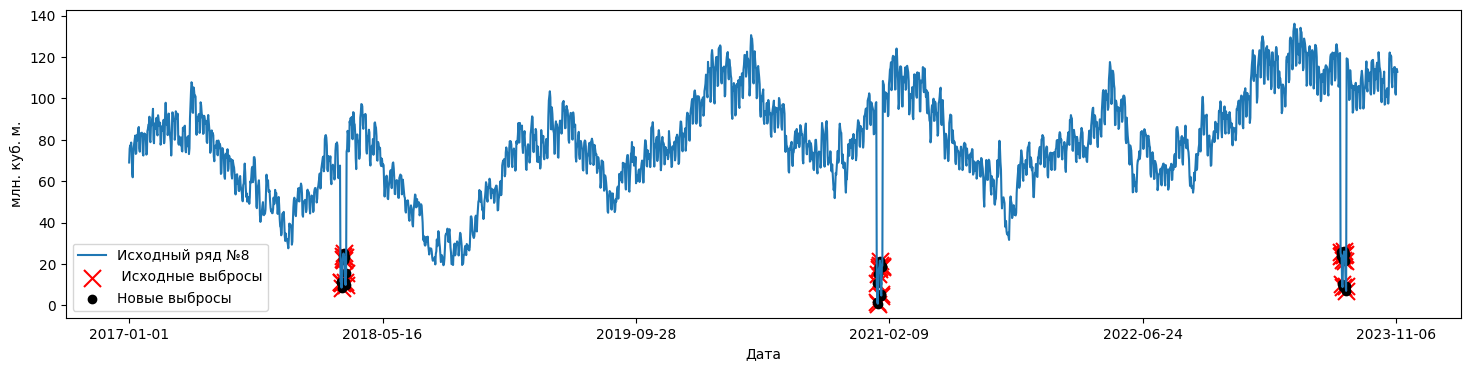

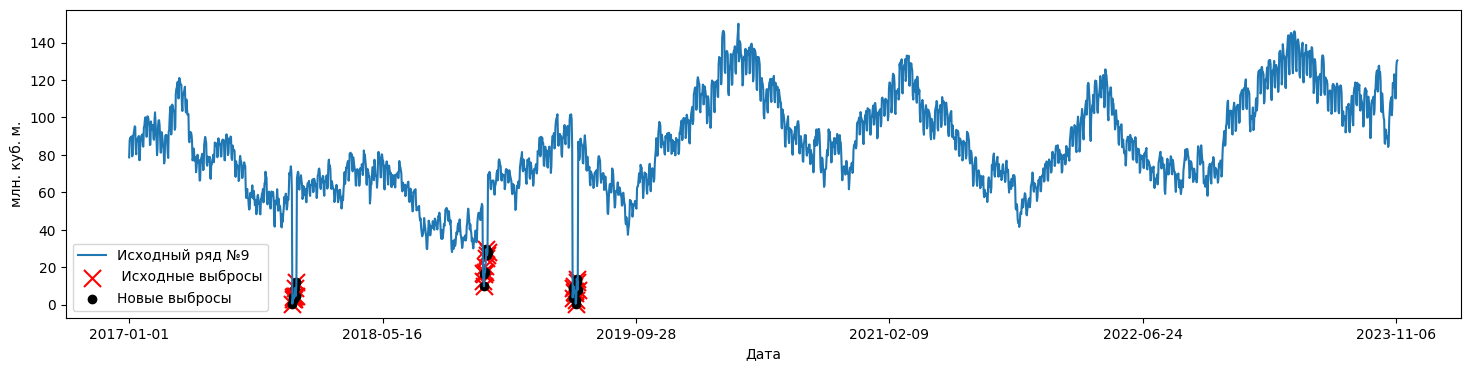

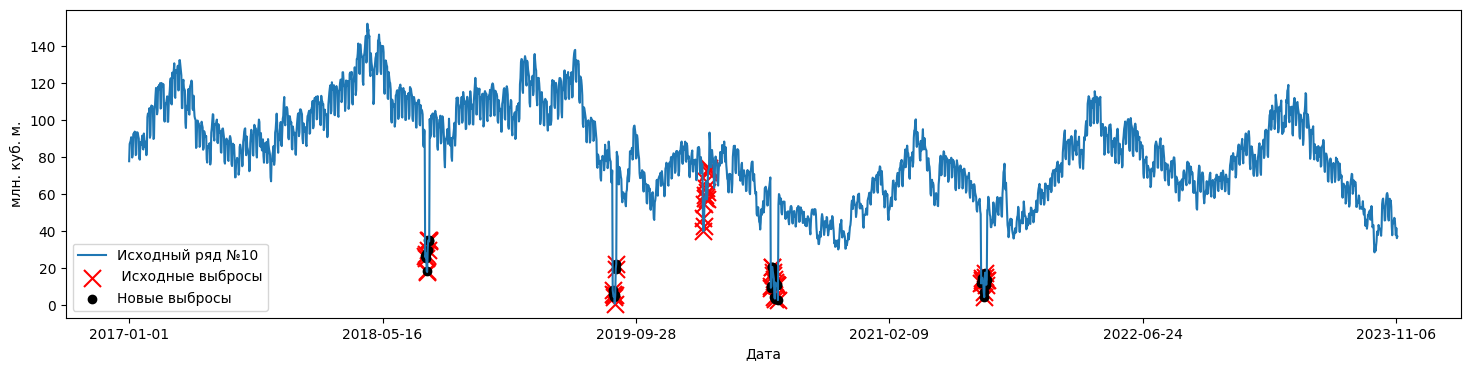

,time_index,values,outlier,series_id,new_outlier
0,2017-01-01,90.942230,0,1,0.0
1,2017-01-02,96.095910,0,1,0.0
2,2017-01-03,95.969240,0,1,0.0
3,2017-01-04,95.859910,0,1,0.0
4,2017-01-05,95.831190,0,1,0.0
...,...,...,...,...,...
25025,2023-11-04,42.085870,0,10,0.0
25026,2023-11-05,37.721855,0,10,0.0
25027,2023-11-06,41.621674,0,10,0.0
25028,2023-11-07,36.105648,0,10,0.0


In [7]:
correction_visualization('task_3.csv', 50, 30)